In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et
from netCDF4 import date2index
from datetime import datetime

### Opening and visualising the data

In [2]:
ds = xr.open_dataset('C:\\Users\\Support\\Downloads\\adaptor.mars.internal-1709923887.9939592-28895-12-8b32f5c6-1e24-4553-a793-1dbf575f4f03.nc')

This dataset contains the monthly average value from year 2007 to 2022 u-componenent of wind(u10),v-componenent of wind(v10), dewpoint tempearture(d2m), temperature(t2m), surface pressure(sp), total precipitation(tp) of the Indian region ( lat : 8 to 37, lon : 68 to 97)

In [3]:
ds
#the variables of the dataset

<xarray.Dataset> Size: 63MB
Dimensions:    (longitude: 117, latitude: 117, time: 192)
Coordinates:
  * longitude  (longitude) float32 468B 68.0 68.25 68.5 ... 96.5 96.75 97.0
  * latitude   (latitude) float32 468B 37.0 36.75 36.5 36.25 ... 8.5 8.25 8.0
  * time       (time) datetime64[ns] 2kB 2007-01-01 2007-02-01 ... 2022-12-01
Data variables:
    u10        (time, latitude, longitude) float32 11MB ...
    v10        (time, latitude, longitude) float32 11MB ...
    d2m        (time, latitude, longitude) float32 11MB ...
    t2m        (time, latitude, longitude) float32 11MB ...
    sp         (time, latitude, longitude) float32 11MB ...
    tp         (time, latitude, longitude) float32 11MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-08 18:51:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
nc = Dataset('C:\\Users\\Support\\Downloads\\adaptor.mars.internal-1709923887.9939592-28895-12-8b32f5c6-1e24-4553-a793-1dbf575f4f03.nc','r')
for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)

longitude degrees_east (117,)
latitude degrees_north (117,)
time hours since 1900-01-01 00:00:00.0 (192,)
u10 m s**-1 (192, 117, 117)
v10 m s**-1 (192, 117, 117)
d2m K (192, 117, 117)
t2m K (192, 117, 117)
sp Pa (192, 117, 117)
tp m (192, 117, 117)


In [5]:
lat = ds.latitude
lon = ds.longitude

In [6]:
lat

<xarray.DataArray 'latitude' (latitude: 117)> Size: 468B
array([37.  , 36.75, 36.5 , 36.25, 36.  , 35.75, 35.5 , 35.25, 35.  , 34.75,
       34.5 , 34.25, 34.  , 33.75, 33.5 , 33.25, 33.  , 32.75, 32.5 , 32.25,
       32.  , 31.75, 31.5 , 31.25, 31.  , 30.75, 30.5 , 30.25, 30.  , 29.75,
       29.5 , 29.25, 29.  , 28.75, 28.5 , 28.25, 28.  , 27.75, 27.5 , 27.25,
       27.  , 26.75, 26.5 , 26.25, 26.  , 25.75, 25.5 , 25.25, 25.  , 24.75,
       24.5 , 24.25, 24.  , 23.75, 23.5 , 23.25, 23.  , 22.75, 22.5 , 22.25,
       22.  , 21.75, 21.5 , 21.25, 21.  , 20.75, 20.5 , 20.25, 20.  , 19.75,
       19.5 , 19.25, 19.  , 18.75, 18.5 , 18.25, 18.  , 17.75, 17.5 , 17.25,
       17.  , 16.75, 16.5 , 16.25, 16.  , 15.75, 15.5 , 15.25, 15.  , 14.75,
       14.5 , 14.25, 14.  , 13.75, 13.5 , 13.25, 13.  , 12.75, 12.5 , 12.25,
       12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 468B 37.0 36.75 36.5 36.25 ... 8.5 8.25 8.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [7]:
lon

<xarray.DataArray 'longitude' (longitude: 117)> Size: 468B
array([68.  , 68.25, 68.5 , 68.75, 69.  , 69.25, 69.5 , 69.75, 70.  , 70.25,
       70.5 , 70.75, 71.  , 71.25, 71.5 , 71.75, 72.  , 72.25, 72.5 , 72.75,
       73.  , 73.25, 73.5 , 73.75, 74.  , 74.25, 74.5 , 74.75, 75.  , 75.25,
       75.5 , 75.75, 76.  , 76.25, 76.5 , 76.75, 77.  , 77.25, 77.5 , 77.75,
       78.  , 78.25, 78.5 , 78.75, 79.  , 79.25, 79.5 , 79.75, 80.  , 80.25,
       80.5 , 80.75, 81.  , 81.25, 81.5 , 81.75, 82.  , 82.25, 82.5 , 82.75,
       83.  , 83.25, 83.5 , 83.75, 84.  , 84.25, 84.5 , 84.75, 85.  , 85.25,
       85.5 , 85.75, 86.  , 86.25, 86.5 , 86.75, 87.  , 87.25, 87.5 , 87.75,
       88.  , 88.25, 88.5 , 88.75, 89.  , 89.25, 89.5 , 89.75, 90.  , 90.25,
       90.5 , 90.75, 91.  , 91.25, 91.5 , 91.75, 92.  , 92.25, 92.5 , 92.75,
       93.  , 93.25, 93.5 , 93.75, 94.  , 94.25, 94.5 , 94.75, 95.  , 95.25,
       95.5 , 95.75, 96.  , 96.25, 96.5 , 96.75, 97.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 468B 68.0 68.25 68.5 ... 96.5 96.75 97.0
Attributes:
    units:      degrees_east
    long_name:  longitude

{68: ([<matplotlib.lines.Line2D at 0x166671e8e10>],
  [Text(68.023, 7.69, '68°E')]),
 78: ([<matplotlib.lines.Line2D at 0x16668323950>],
  [Text(78.005, 7.69, '78°E')]),
 88: ([<matplotlib.lines.Line2D at 0x16668355650>],
  [Text(88.018, 7.69, '88°E')])}

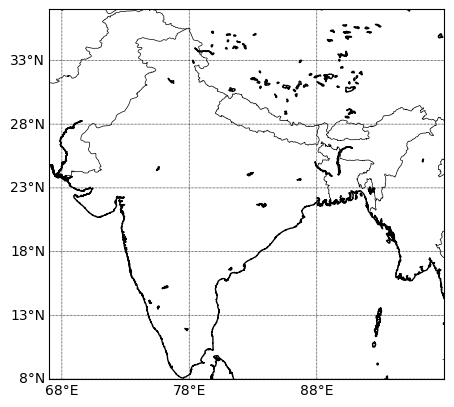

In [8]:
m = Basemap(projection='cyl', llcrnrlon=67, llcrnrlat=8, urcrnrlon=98, urcrnrlat=37, resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(8,37+.6,5)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(68,98,10)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

#plotting the region obtained in the dataset(Indian region) along with latitudes and longitudes

In [9]:
temp_2m = ds.t2m[1,:,:]

Visualising the distributuin if various variables over the subcontinent

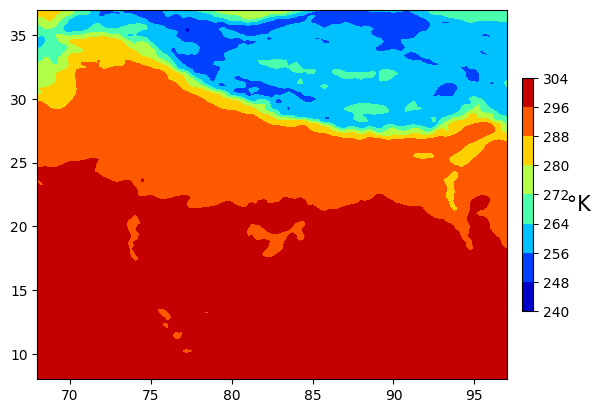

In [10]:
cf = plt.contourf(lon, lat, temp_2m, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)

plt.show()

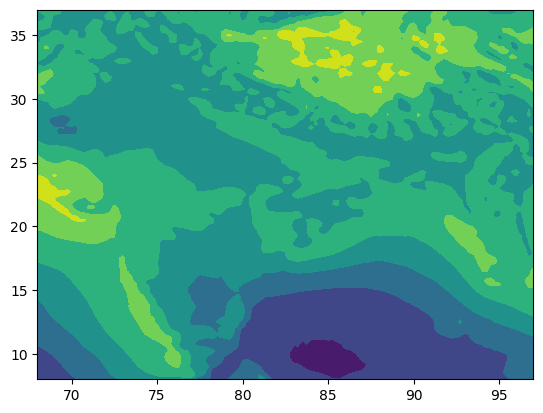

In [11]:
wind_u = ds.u10[1,:,:]
ccf = plt.contourf(lon,lat,wind_u)
cb = plt.colorbar(cf,fraction = 0.0235,pad= 0.03)
cb.set_label('ms\u207b\u00b9',fontsize=15,rotation=0)
plt.show()

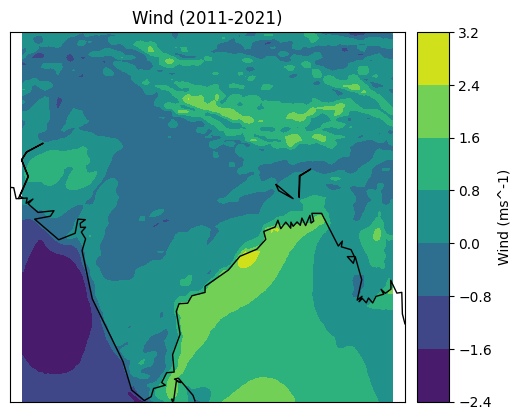

In [12]:
wind_v = ds.variables['v10'][:]
wind_av_2021_2022= np.mean(wind_v[:,:,:],axis = 0)
plt.figure()
plt.rcParams["figure.figsize"] = (16,8)
map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98)
map.drawcoastlines(color="black")
lons,lats = np.meshgrid(ds.variables['longitude'][:], ds.variables['latitude'][:])
x,y = map(lons, lats)
rain_plot = map.contourf(x, y, wind_av_2021_2022, cmap=plt.cm.viridis)
cb = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend = 'both')
cb.set_label(u"Wind (ms^-1)")
plt.title("Wind (2011-2021)")
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=10)
plt.show()

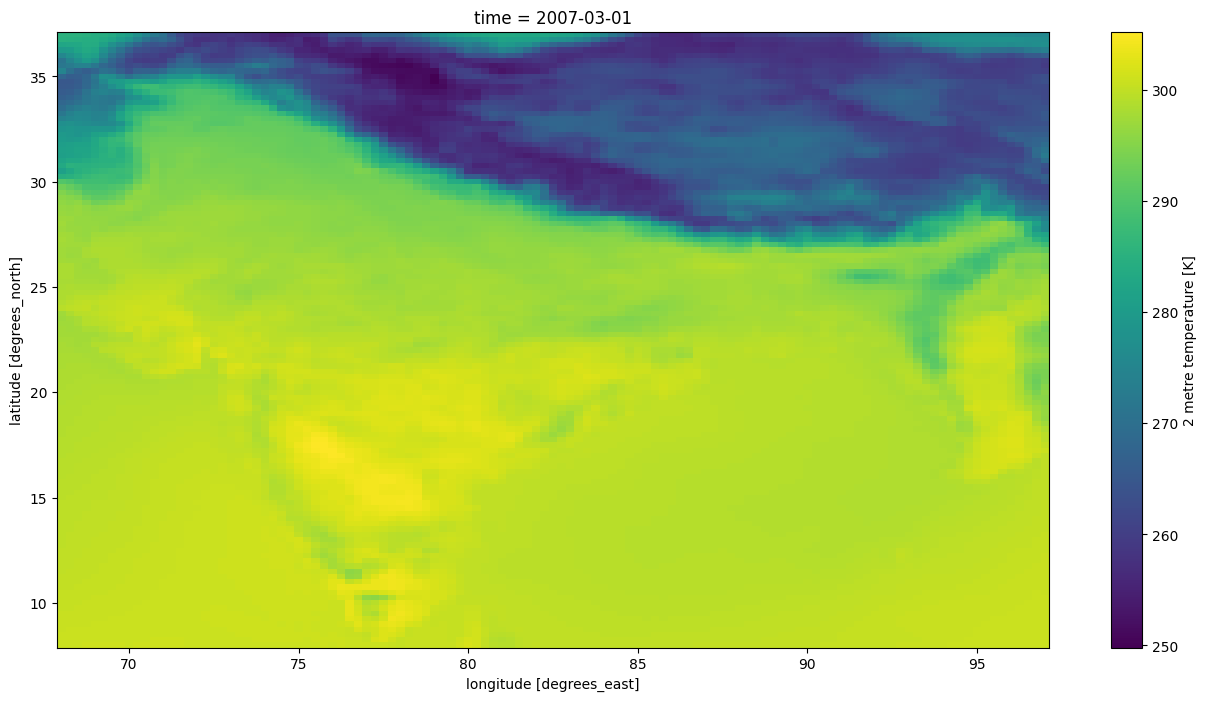

In [13]:
ds.t2m[2].plot()

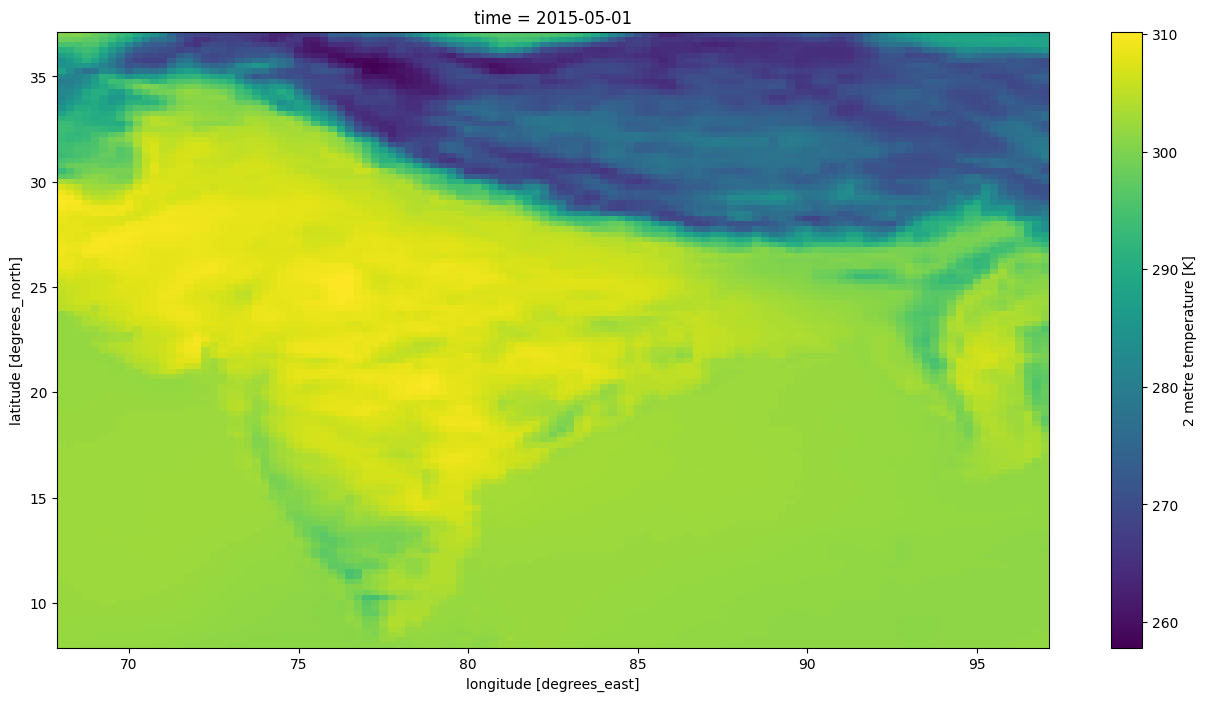

In [14]:
ds.t2m[100].plot()

### Extracting Information from the netcdf data by converting it to a dataframe

Here I have chosen the latitude and longitude of bihar to extract all information corresponding to a particular lat-lon

In [15]:
newds=ds.sel(longitude=85.313119, latitude=25.096, method='nearest')

In [16]:
df = newds.to_dataframe()
#convert kelvin to celcius
df['t2m']=df['t2m']-273.15
#save the dataframe for future use
x = df.to_csv('temperature_bihar.csv')

In [17]:
df

,longitude,latitude,u10,v10,d2m,t2m,sp,tp
time,,,,,,,,
2007-01-01,85.25,25.0,1.822654,0.003012,281.709442,16.240448,100719.968750,0.000029
2007-02-01,85.25,25.0,0.106863,-0.003371,287.143036,19.807800,100417.445312,0.001960
2007-03-01,85.25,25.0,1.622461,-0.024053,285.549255,24.564636,100105.890625,0.000843
2007-04-01,85.25,25.0,0.076968,0.067868,289.306580,31.406921,99626.273438,0.000425
2007-05-01,85.25,25.0,-0.676293,0.101062,293.287109,32.333649,99291.765625,0.001665
...,...,...,...,...,...,...,...,...
2022-08-01,85.25,25.0,-1.886796,0.314525,299.386566,29.960175,99199.937500,0.005890
2022-09-01,85.25,25.0,-1.057195,0.302013,299.479736,29.065338,99548.382812,0.007500
2022-10-01,85.25,25.0,0.510453,-0.005669,295.644775,26.589630,100129.671875,0.002792


In [18]:
df.reset_index(inplace=True)

In [19]:
df

,time,longitude,latitude,u10,v10,d2m,t2m,sp,tp
0,2007-01-01,85.25,25.0,1.822654,0.003012,281.709442,16.240448,100719.968750,0.000029
1,2007-02-01,85.25,25.0,0.106863,-0.003371,287.143036,19.807800,100417.445312,0.001960
2,2007-03-01,85.25,25.0,1.622461,-0.024053,285.549255,24.564636,100105.890625,0.000843
3,2007-04-01,85.25,25.0,0.076968,0.067868,289.306580,31.406921,99626.273438,0.000425
4,2007-05-01,85.25,25.0,-0.676293,0.101062,293.287109,32.333649,99291.765625,0.001665
...,...,...,...,...,...,...,...,...,...
187,2022-08-01,85.25,25.0,-1.886796,0.314525,299.386566,29.960175,99199.937500,0.005890
188,2022-09-01,85.25,25.0,-1.057195,0.302013,299.479736,29.065338,99548.382812,0.007500
189,2022-10-01,85.25,25.0,0.510453,-0.005669,295.644775,26.589630,100129.671875,0.002792
190,2022-11-01,85.25,25.0,1.426805,0.046420,288.791168,21.285309,100440.398438,0.000003


In [20]:
df = df.groupby(df.time.dt.year)[df.columns].mean()

In [21]:
df

,time,longitude,latitude,u10,v10,d2m,t2m,sp,tp
time,,,,,,,,,
2007,2007-06-16 12:00:00,85.25,25.0,0.201710,0.158747,291.556671,25.703638,99774.804688,0.003966
2008,2008-06-16 08:00:00,85.25,25.0,0.212298,0.045952,291.429108,25.817148,99736.406250,0.003717
2009,2009-06-16 12:00:00,85.25,25.0,0.568687,0.027716,290.714569,26.538492,99731.898438,0.002841
2010,2010-06-16 12:00:00,85.25,25.0,0.182403,-0.050779,291.338104,26.990053,99725.617188,0.002185
2011,2011-06-16 12:00:00,85.25,25.0,-0.068795,0.009332,291.490479,25.590597,99740.570312,0.003347
2012,2012-06-16 08:00:00,85.25,25.0,0.526491,0.111914,290.793976,25.884857,99710.585938,0.002814
2013,2013-06-16 12:00:00,85.25,25.0,-0.153388,0.044930,291.966400,25.438059,99795.031250,0.003176
2014,2014-06-16 12:00:00,85.25,25.0,0.580766,-0.003414,291.583344,25.436319,99874.281250,0.002550
2015,2015-06-16 12:00:00,85.25,25.0,0.173661,-0.065822,292.610596,26.169489,99907.687500,0.002472


In [22]:
df.drop('time',axis=1,inplace =True)

In [23]:
df

,longitude,latitude,u10,v10,d2m,t2m,sp,tp
time,,,,,,,,
2007,85.25,25.0,0.201710,0.158747,291.556671,25.703638,99774.804688,0.003966
2008,85.25,25.0,0.212298,0.045952,291.429108,25.817148,99736.406250,0.003717
2009,85.25,25.0,0.568687,0.027716,290.714569,26.538492,99731.898438,0.002841
2010,85.25,25.0,0.182403,-0.050779,291.338104,26.990053,99725.617188,0.002185
2011,85.25,25.0,-0.068795,0.009332,291.490479,25.590597,99740.570312,0.003347
2012,85.25,25.0,0.526491,0.111914,290.793976,25.884857,99710.585938,0.002814
2013,85.25,25.0,-0.153388,0.044930,291.966400,25.438059,99795.031250,0.003176
2014,85.25,25.0,0.580766,-0.003414,291.583344,25.436319,99874.281250,0.002550
2015,85.25,25.0,0.173661,-0.065822,292.610596,26.169489,99907.687500,0.002472


#### The target data, which shows percent of population in different pm2.5 categories in various regions of India, annually 

In [24]:
dft = pd.read_csv('IndiaPM25-V5GL04-Annual-REGIONAL-1998-2022-wThresFrac.csv')
dft

,Region,Year,Population-Weighted PM2.5 [ug/m3],Geographic-Mean PM2.5 [ug/m3],Population Coverage [%],Geographic Coverage [%],Total Population [million people],% pop >= 5 ug/m3 [%],% pop >= 10 ug/m3 [%],% pop >= 15 ug/m3 [%],% pop >= 25 ug/m3 [%],% pop >= 30 ug/m3 [%],% pop >= 35 ug/m3 [%],% pop >= 40 ug/m3 [%],% pop >= 45 ug/m3 [%],% pop >= 50 ug/m3 [%],% pop >= 55 ug/m3 [%],% pop >= 60 ug/m3 [%]
0,Andaman and Nicobar,1998,16.5,15.8,99.5,98.7,0.331,100.0,95.7,77.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Andaman and Nicobar,1999,16.1,15.8,99.5,98.7,0.331,100.0,100.0,76.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Andaman and Nicobar,2000,18.2,17.7,99.5,98.7,0.331,100.0,100.0,87.9,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Andaman and Nicobar,2001,18.9,18.0,99.5,98.7,0.333,100.0,100.0,88.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andaman and Nicobar,2002,19.7,18.7,99.5,98.7,0.336,100.0,100.0,88.5,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,West Bengal,2018,63.0,62.8,100.0,99.9,99.116,100.0,100.0,100.0,100.0,100.0,99.7,99.4,98.2,95.3,85.4,69.6
896,West Bengal,2019,55.5,56.7,100.0,99.9,99.884,100.0,100.0,100.0,100.0,99.7,99.5,97.0,92.0,78.8,57.5,26.6
897,West Bengal,2020,58.0,59.5,100.0,99.9,100.651,100.0,100.0,100.0,100.0,99.8,99.6,97.9,94.3,81.2,61.1,46.0
898,West Bengal,2021,60.5,61.6,100.0,99.9,100.651,100.0,100.0,100.0,100.0,99.8,99.5,99.0,95.7,93.9,78.2,52.9


In [25]:
dft.drop(dft[dft['Region']!='Bihar'].index,inplace=True)

In [26]:
dft

,Region,Year,Population-Weighted PM2.5 [ug/m3],Geographic-Mean PM2.5 [ug/m3],Population Coverage [%],Geographic Coverage [%],Total Population [million people],% pop >= 5 ug/m3 [%],% pop >= 10 ug/m3 [%],% pop >= 15 ug/m3 [%],% pop >= 25 ug/m3 [%],% pop >= 30 ug/m3 [%],% pop >= 35 ug/m3 [%],% pop >= 40 ug/m3 [%],% pop >= 45 ug/m3 [%],% pop >= 50 ug/m3 [%],% pop >= 55 ug/m3 [%],% pop >= 60 ug/m3 [%]
100,Bihar,1998,47.6,45.6,100.0,100.0,84.765,100.0,100.0,100.0,99.9,99.3,96.7,89.6,71.6,36.4,9.4,0.0
101,Bihar,1999,49.1,47.0,100.0,100.0,84.765,100.0,100.0,100.0,100.0,99.5,97.3,91.6,74.1,49.9,19.5,1.8
102,Bihar,2000,54.7,52.2,100.0,100.0,84.765,100.0,100.0,100.0,99.9,99.7,98.9,95.4,84.5,67.5,51.0,28.3
103,Bihar,2001,61.0,58.3,100.0,100.0,86.839,100.0,100.0,100.0,100.0,100.0,99.7,98.9,95.2,86.3,70.8,54.9
104,Bihar,2002,57.3,55.1,100.0,100.0,88.914,100.0,100.0,100.0,100.0,100.0,99.8,98.8,93.8,78.7,62.2,38.7
105,Bihar,2003,58.9,56.7,100.0,100.0,90.988,100.0,100.0,100.0,100.0,100.0,100.0,99.3,95.9,82.2,66.0,47.3
106,Bihar,2004,60.9,58.5,100.0,100.0,93.063,100.0,100.0,100.0,100.0,100.0,100.0,99.7,97.1,88.1,71.4,55.4
107,Bihar,2005,59.6,57.1,100.0,100.0,95.137,100.0,100.0,100.0,100.0,100.0,99.8,98.3,94.6,84.3,67.3,47.8
108,Bihar,2006,67.4,64.5,100.0,100.0,97.233,100.0,100.0,100.0,100.0,100.0,99.8,99.6,98.3,94.5,84.4,73.8
109,Bihar,2007,68.6,65.5,100.0,100.0,99.328,100.0,100.0,100.0,100.0,100.0,99.9,99.7,99.1,96.3,87.9,73.4


In [27]:
dft.reset_index(inplace=True)
dft.drop('index',axis =1,inplace=True)

In [28]:
dft.drop(dft[dft.Year < 2007].index,inplace =True)

In [29]:
dft

,Region,Year,Population-Weighted PM2.5 [ug/m3],Geographic-Mean PM2.5 [ug/m3],Population Coverage [%],Geographic Coverage [%],Total Population [million people],% pop >= 5 ug/m3 [%],% pop >= 10 ug/m3 [%],% pop >= 15 ug/m3 [%],% pop >= 25 ug/m3 [%],% pop >= 30 ug/m3 [%],% pop >= 35 ug/m3 [%],% pop >= 40 ug/m3 [%],% pop >= 45 ug/m3 [%],% pop >= 50 ug/m3 [%],% pop >= 55 ug/m3 [%],% pop >= 60 ug/m3 [%]
9,Bihar,2007,68.6,65.5,100.0,100.0,99.328,100.0,100.0,100.0,100.0,100.0,99.9,99.7,99.1,96.3,87.9,73.4
10,Bihar,2008,73.1,70.5,100.0,100.0,101.423,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.9,99.3,97.0,89.2
11,Bihar,2009,75.2,72.0,100.0,100.0,103.518,100.0,100.0,100.0,100.0,100.0,100.0,99.8,99.6,98.3,95.4,88.7
12,Bihar,2010,68.5,65.5,100.0,100.0,105.613,100.0,100.0,100.0,100.0,100.0,99.9,99.7,99.0,96.9,90.8,75.7
13,Bihar,2011,77.1,73.9,100.0,100.0,107.678,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.5,97.9,93.7
14,Bihar,2012,78.2,74.4,100.0,100.0,109.742,100.0,100.0,100.0,100.0,100.0,100.0,99.8,99.5,98.6,96.2,90.3
15,Bihar,2013,76.2,72.7,100.0,100.0,111.806,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.7,98.7,96.4,91.5
16,Bihar,2014,73.7,70.0,100.0,100.0,113.871,100.0,100.0,100.0,100.0,100.0,99.9,99.7,99.4,98.0,94.4,87.2
17,Bihar,2015,70.0,67.2,100.0,100.0,115.935,100.0,100.0,100.0,100.0,100.0,100.0,99.9,99.6,98.5,94.5,85.2
18,Bihar,2016,74.7,71.4,100.0,100.0,118.033,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.8,97.8,93.0,83.9


In [30]:
col =[]
for i in range(16):
    col.append(i)
col.append(17)
dft.drop(dft.columns[col],axis=1,inplace = True)

In [31]:
dft

,% pop >= 55 ug/m3 [%]
9,87.9
10,97.0
11,95.4
12,90.8
13,97.9
14,96.2
15,96.4
16,94.4
17,94.5
18,93.0


In [32]:
cols = [0,1]
X = df.drop(df.columns[cols],axis=1)
X

,u10,v10,d2m,t2m,sp,tp
time,,,,,,
2007,0.201710,0.158747,291.556671,25.703638,99774.804688,0.003966
2008,0.212298,0.045952,291.429108,25.817148,99736.406250,0.003717
2009,0.568687,0.027716,290.714569,26.538492,99731.898438,0.002841
2010,0.182403,-0.050779,291.338104,26.990053,99725.617188,0.002185
2011,-0.068795,0.009332,291.490479,25.590597,99740.570312,0.003347
2012,0.526491,0.111914,290.793976,25.884857,99710.585938,0.002814
2013,-0.153388,0.044930,291.966400,25.438059,99795.031250,0.003176
2014,0.580766,-0.003414,291.583344,25.436319,99874.281250,0.002550
2015,0.173661,-0.065822,292.610596,26.169489,99907.687500,0.002472


<Axes: xlabel='time', ylabel='t2m'>

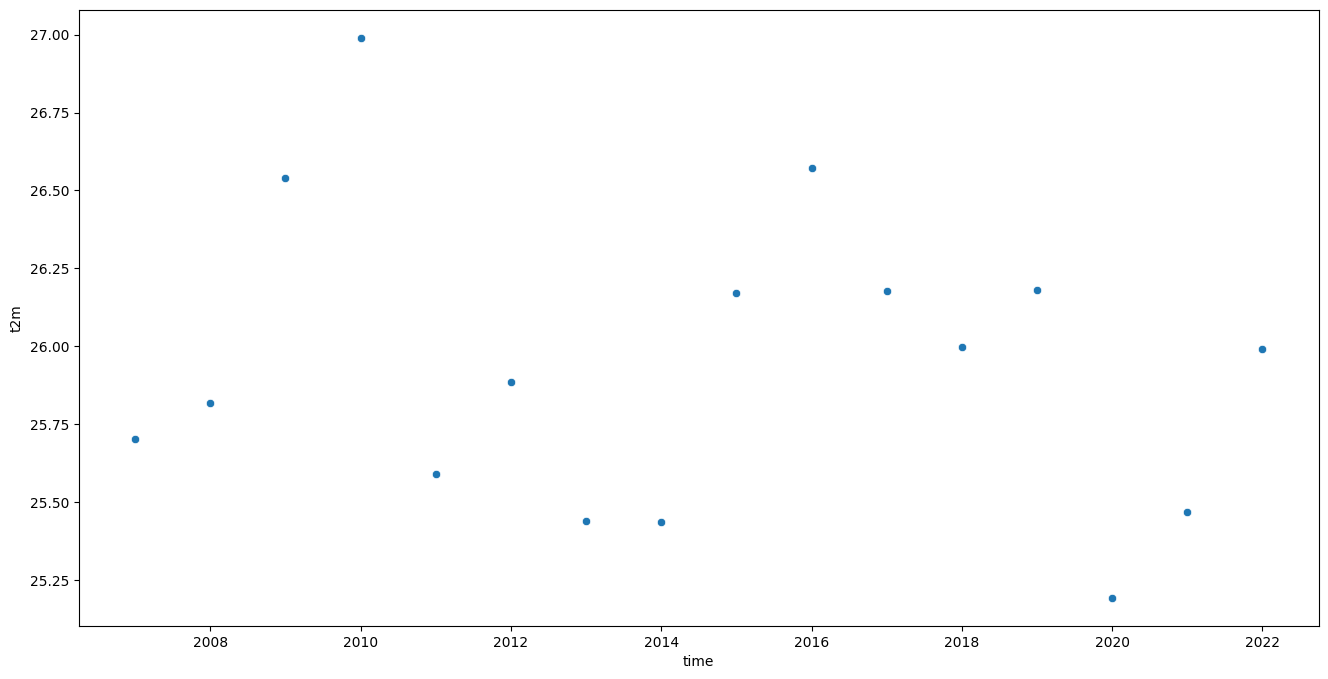

In [88]:
sns.scatterplot(X,y='t2m',x = 'time')

In [33]:
y = dft
y

,% pop >= 55 ug/m3 [%]
9,87.9
10,97.0
11,95.4
12,90.8
13,97.9
14,96.2
15,96.4
16,94.4
17,94.5
18,93.0


### Modelling the data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

#### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr.intercept_

array([3134.7112], dtype=float32)

In [38]:
lr.coef_

array([[ 2.8550444e+00, -5.7431755e+01,  1.4789436e+00, -5.9768877e+00,
        -3.3293251e-02,  2.3919519e+03]], dtype=float32)

In [39]:
y_pred = lr.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [41]:
mean_absolute_error(y_test, y_pred)

3.854052734375

In [42]:
mean_squared_error(y_test, y_pred)

25.40963266134263

In [43]:
r2_score(y_test, y_pred)

-25.62367210953758

In [44]:
from math import sqrt
print("RMSE :",sqrt(mean_squared_error(y_test, y_pred)))

RMSE : 5.040796828016641


#### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [46]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [47]:
dt_y_pred = regressor.predict(X_test)

In [48]:
mean_absolute_error(y_test, dt_y_pred)

2.2

In [49]:
mean_squared_error(y_test, dt_y_pred)

5.868

In [50]:
r2_score(y_test, dt_y_pred)

-5.148365465213756

In [51]:
from math import sqrt
print("RMSE :",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE : 2.422395508582362


#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [53]:
RFregressor.fit(X_train, y_train.values.ravel())
#y needed to be passed as 1d array rather than column vector

RandomForestRegressor(random_state=0)

In [54]:
rf_y_pred = RFregressor.predict(X_test)

In [55]:
mean_absolute_error(y_test, rf_y_pred)

3.1916000000000566

In [56]:
mean_squared_error(y_test, rf_y_pred)

10.424726000000383

In [57]:
r2_score(y_test, rf_y_pred)

-9.922805951383486

In [58]:
from math import sqrt
print("RMSE :",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE : 3.228734426985345


#### XGBoost

In [59]:
from xgboost.sklearn import XGBRegressor

In [60]:
# from sklearn.model_selection import GridSearchCV
# xgb_reg = XGBRegressor()
# param_grid = {'learning_rate':[0.01,0.1,1],'max_depth=':[2,3,6,8], 'min_child_weight':[0.1,1,5,10,20]}
# grid = GridSearchCV(xgb_reg,param_grid)
# grid.fit(X_train,y_train)

In [61]:
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=1, seed=0)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb_y_pred = xgb_reg.predict(X_test)

In [63]:
mean_absolute_error(y_test, xgb_y_pred)

2.076646423339844

In [64]:
mean_squared_error(y_test, xgb_y_pred)

5.8990687863691775

In [65]:
r2_score(y_test, xgb_y_pred)

-5.180918678090094

In [66]:
from math import sqrt
print("RMSE :",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE : 2.4287998654416088


### XGBoost performed better than Random forest

#### Predicting future values

In [67]:
X_new = xr.open_dataset('C:\\Users\\Support\\Downloads\\adaptor.mars.internal-1710229478.7860358-12968-6-c2d3388b-0fcc-4a00-94da-5ef1a2ff75ea.nc')
#This dataset have the predictor values for 2023 and 2024

In [68]:
X_new=X_new.sel(longitude=85.313119, latitude=25.096, method='nearest')

In [69]:
df = X_new.to_dataframe()
#convert kelvin to celcius
df['t2m']=df['t2m']-273.15

In [70]:
df.reset_index(inplace=True)

In [71]:
df = df.groupby(df.time.dt.year)[df.columns].mean()

In [72]:
df.drop('time',axis=1,inplace =True)

In [73]:
df

,expver,longitude,latitude,u10,v10,d2m,t2m,sp,tp
time,,,,,,,,,
2023,3.0,85.25,25.0,0.591875,0.014506,292.514557,26.395010,99911.34375,0.002855
2024,3.0,85.25,25.0,1.071186,-0.165526,285.704346,16.896408,100711.40625,0.000667


In [74]:
cols = [0,1,2]
X_f = df.drop(df.columns[cols],axis=1)
X_f

,u10,v10,d2m,t2m,sp,tp
time,,,,,,
2023,0.591875,0.014506,292.514557,26.395010,99911.34375,0.002855
2024,1.071186,-0.165526,285.704346,16.896408,100711.40625,0.000667


In [75]:
xgb_yf_pred = xgb_reg.predict(X_f)

In [76]:
xgb_yf_pred

array([95.56028 , 93.709435], dtype=float32)

In [78]:
#predicted values - 2023 - 95.56%
#2024 - 93.709
#note 2024 has incomplete data(till march), and the pm 2.5 has most concentration in colder months like november, hence predicted
#value of 2024 is less than 2023